# CORRELATION

Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis: "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".

References:

M. Hall 1999, <a href="https://www.cs.waikato.ac.nz/~mhall/thesis.pdf">Correlation-based Feature Selection for Machine Learning <a>

# LIBS

In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
df = pd.read_csv('data2.csv')
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [3]:
df.shape

(50000, 109)

In [4]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels = ['target'], axis =1 ),
    df['target'],
    test_size = 0.3,
    random_state = 0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

## CORRELATION MATRIX

<AxesSubplot:>

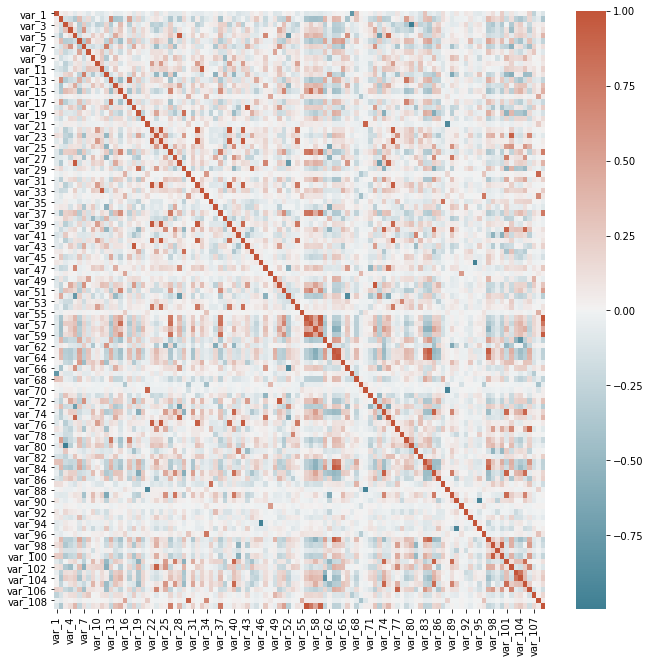

In [5]:
# visualise correlated features:

corr = X_train.corr(method = 'pearson')
cmap = sns.diverging_palette(220, 20, as_cmap = True)

fig, ax = plt.subplots()
fig.set_size_inches(11, 11)

sns.heatmap(corr, cmap = cmap)

## CORRELATION SCATTERPLOTS

In [6]:
# Looking at the heatmap, we see that var25 is highly correlated 
# with others in the dataset

# with this code we can get the other variable names
# and also print the correlation coefficient between var25 and 
# these variables:

c = 0

for i in corr.loc['var_5']:
    if i > 0.8: #if highly correlated
        
        print(corr.columns[c], i)
        
    c = c + 1

var_5 1.0
var_28 0.9536721652384935
var_75 0.8616179292025201


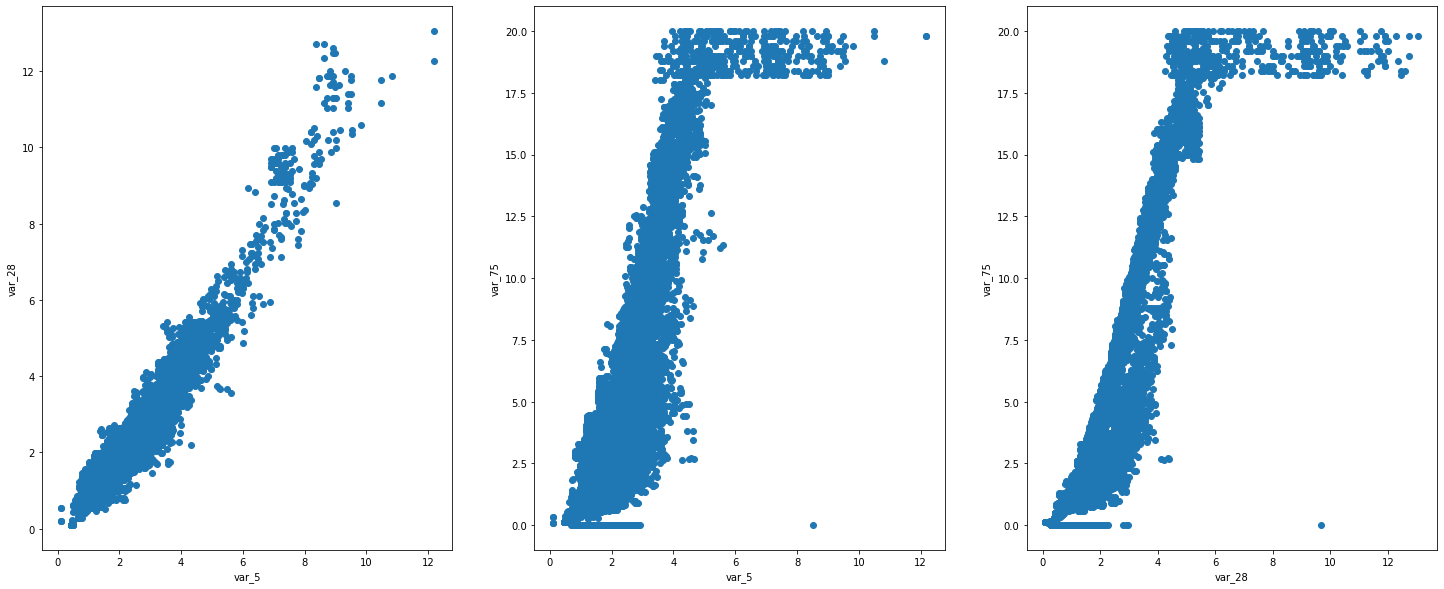

In [7]:
# plot the variables

plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)
plt.scatter(X_train['var_5'], X_train['var_28'])
plt.ylabel('var_28')
plt.xlabel('var_5')

plt.subplot(1, 3, 2)
plt.scatter(X_train['var_5'], X_train['var_75'])
plt.ylabel('var_75')
plt.xlabel('var_5')

plt.subplot(1, 3, 3)
plt.scatter(X_train['var_28'], X_train['var_75'])
plt.ylabel('var_75')
plt.xlabel('var_28')

plt.show()

We see that the correlation of the second pair of variables is not quite linear.

Next, let's identify a couple of negatively correlated variables

In [8]:
c = 0

for i in corr.loc['var_88']:
    if i < -0.8:
    
        print(corr.columns[c], i)
    
    c += 1

var_21 -0.8943929785046758
var_70 -0.9489465365954278


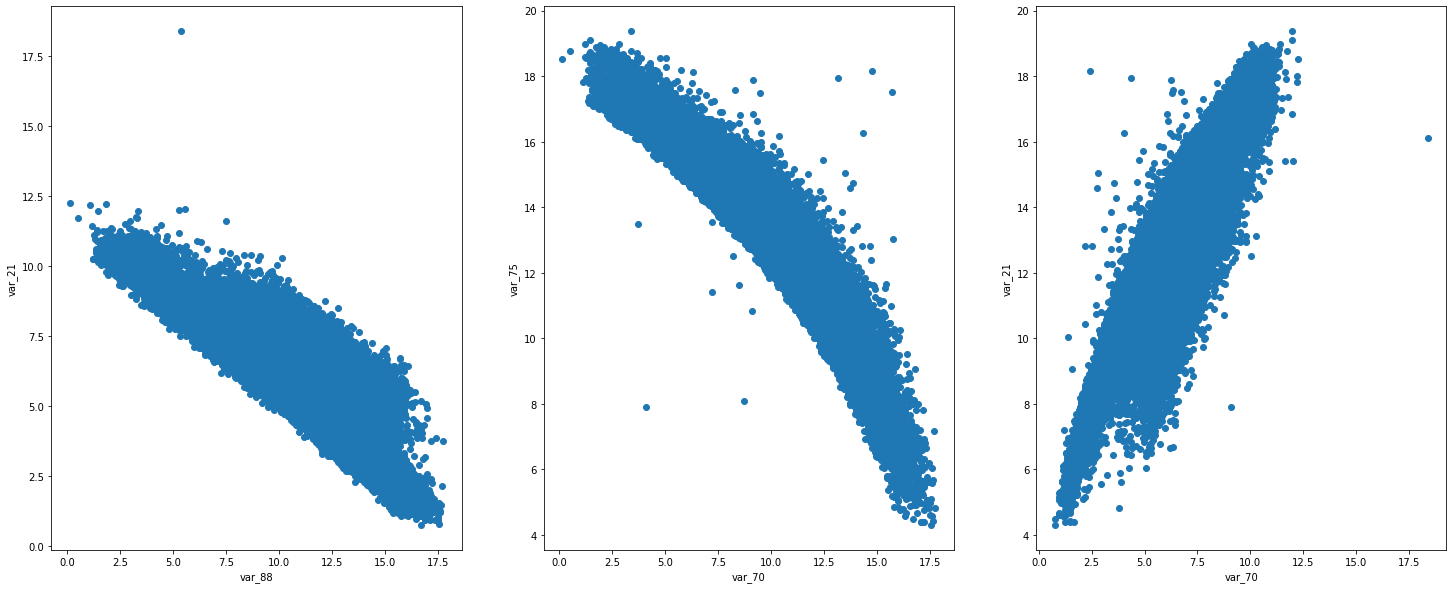

In [9]:
# plot the variables

plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)
plt.scatter(X_train['var_88'], X_train['var_21'])
plt.ylabel('var_21')
plt.xlabel('var_88')

plt.subplot(1, 3, 2)
plt.scatter(X_train['var_88'], X_train['var_70'])
plt.ylabel('var_75')
plt.xlabel('var_70')

plt.subplot(1, 3, 3)
plt.scatter(X_train['var_21'], X_train['var_70'])
plt.ylabel('var_21')
plt.xlabel('var_70')

plt.show()

# REMOVE CORRELATED

In [10]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any further insight.

def correlation(dataset, threshold):
    
    # create a set where I will store the names of correlated columns
    col_corr = set()
    
    # create the correlation matrix
    corr_matrix = dataset.corr()
    
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        
        # check with other features
        for j in range(i):
            
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                # print correlation, and variables examined
                # keep in mind that the columns and rows of the dataframe are identical
                # so we can identify the features being examned by looking for i,j
                # in the column names
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                
                # get the name of the correlated feature
                colname = corr_matrix.columns[j]
                
                # and add it to our correlated set
                col_corr.add(colname)
                
    return col_corr

In [11]:
col_corr = set()
col_corr

set()

In [12]:
col_corr.add('var_10')
col_corr

{'var_10'}

In [13]:
def correlation(database, threshold):
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:

                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])

                colname = corr_matrix.columns[j]

            col_corr.add(colname)
        return col_corr

## SECOND APPROACH

The second approach looks to identify groups of highly correlated features. And then, we can make further investigation within these groups to decide which feature we keep and which one we remove.

In [ ]:
#train and test




# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis = 1),
    df['target'],
    test_size = 0.3,
    random_state = 0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [24]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,var_80,var_3,0.994923
1,var_3,var_80,0.994923
2,var_32,var_22,0.990431
3,var_22,var_32,0.990431
4,var_56,var_109,0.987777


In [25]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 27 correlated groups
out of 108 total features


In [35]:
# now we can print out each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

  feature1 feature2      corr
0   var_80    var_3  0.994923

   feature1 feature2      corr
2    var_32   var_22  0.990431
8    var_32   var_24  0.980411
13   var_32   var_39  0.974878
47   var_32   var_76  0.931718
56   var_32   var_42  0.919918

    feature1 feature2      corr
4     var_56  var_109  0.987777
11    var_56   var_59  0.975744
103   var_56   var_57  0.844086

   feature1 feature2      corr
16   var_72   var_50  0.970263

   feature1 feature2      corr
18   var_94   var_46  0.967895

   feature1 feature2      corr
22   var_43   var_18  0.965474

   feature1 feature2      corr
26   var_63   var_84  0.959138
40   var_63   var_97  0.940184
53   var_63   var_64  0.924460

   feature1 feature2      corr
30   var_28    var_5  0.953672
67   var_28   var_75  0.904413

   feature1 feature2      corr
32   var_88   var_70  0.948947
75   var_88   var_21  0.894393

   feature1 feature2      corr
36   var_11   var_33  0.944361

   feature1 feature2      corr
42   var_98  var_100  0.938

In [36]:
# we can now investigate further features within one group.
# let's for example select group 1

group = correlated_groups[1]
group

,feature1,feature2,corr
2,var_32,var_22,0.990431
8,var_32,var_24,0.980411
13,var_32,var_39,0.974878
47,var_32,var_76,0.931718
56,var_32,var_42,0.919918


In this group, several features are highly correlated. Which one should we keep and which ones should we remove?

One criteria to select which features to use from this group, would be to use those with less missing data.

Our dataset contains no missing values, so this is not an option. But keep this in mind when you work with your own datasets.

Alternatively, we could build a machine learning algorithm using all the features from the above list, and select the more predictive one.

In [38]:
# add all features of the group to a list
features = list(group['feature2'].unique())+['var_22']
features

['var_22', 'var_24', 'var_39', 'var_76', 'var_42', 'var_22']

In [40]:
# train a random forest
rf = RandomForestClassifier(n_estimators = 200, random_state = 39, max_depth = 4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=39)

In [48]:
# get the feature importance attributed by the 
# random forest model

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,var_39,0.196934
3,var_76,0.175680
5,var_22,0.167557
0,var_22,0.159403
4,var_42,0.152627
1,var_24,0.147799


In this case, feature var_39 shows the highest importance according to random forests. Then, I would select var_39, and remove all the remaining features from this group from the dataset.

Note

None of the 2 procedures for removing correlated features are perfect, and some correlated features may escape the loops of code. So it might be worthwhile checking that after removing the correlated features, there are no correlated features left in the dataset. If there are, repeat the procedure to remove the remaining ones.

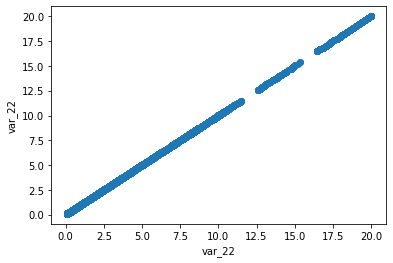

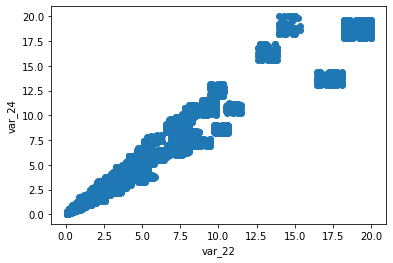

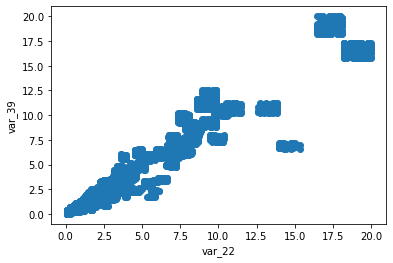

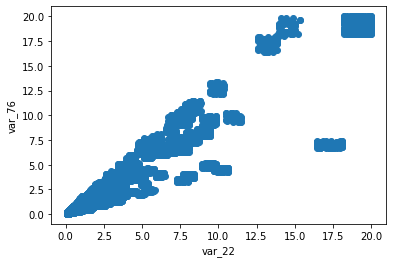

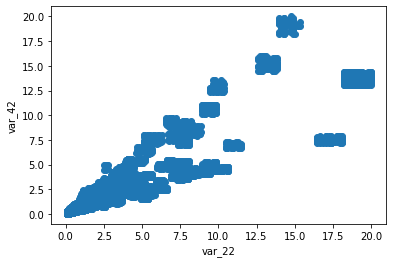

In [49]:
# plot the correlation of the features in the correlated group from the
# previous cell

for feature in group['feature2']:
    plt.scatter(X_train['var_22'], X_train[feature])
    plt.xlabel('var_22')
    plt.ylabel(feature)
    plt.show()